<a href="https://colab.research.google.com/github/nabilaranie/Colabs/blob/main/CaseStudy2_Kelompok_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latihan 2 - Komputasi Statistika B
Anggota Kelompok F:
1. Ammar Hanafi (2206051582)
2. Nabila Putri Maharani (2206053953)
3. Norman Mowlana Aziz (2206025470)
4. Jason Justin Andryana(2206029670)
5. Muhammad Riesya Attaya (2206051494)

# Pertanyaan

A. Cobalah lakukan pengelompokan pada data 2d: a. PetalLenght vs Petal witdh b. SepalLenght vs Sepal width

dan lihat apakah dapat menghasilkan cluster yang sebenarnya? (bayangkan kita tidak memiliki label spesies pada data ini dan ingin membagi bunga menjadi beberapa spesies)

B. Prediksi cluster untuk setiap titik data untuk pendekatan K-Means Clustering dan GMM pada ke dua data 2D di atas. Analisalah hasil perbandingan dari K-Means Clustering dan GMM Clustering.

In [ ]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

# show plots inline
%matplotlib inline

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/gianiarda/latihan2/main/Iris.csv')

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
8,9,4.4,2.9,1.4,0.2,Iris-setosa
122,123,7.7,2.8,6.7,2.0,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
111,112,6.4,2.7,5.3,1.9,Iris-virginica


In [ ]:
# split data into features (X) and labels (y)
X = data.iloc[:,1:5]
X1 = data.iloc[:,1:3] #X1 mendefinisikan SepalLength vs SepalWidth
X2 = data.iloc[:,3:5] #X2 mendefinisikan PetalLength vs PetalWidth
y = data.iloc[:,-1]
print(X.sample(5))
print(X1.sample(5))
print(X2.sample(5))
print(y.sample(5))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
55             5.7           2.8            4.5           1.3
138            6.0           3.0            4.8           1.8
122            7.7           2.8            6.7           2.0
95             5.7           3.0            4.2           1.2
137            6.4           3.1            5.5           1.8
     SepalLengthCm  SepalWidthCm
72             6.3           2.5
119            6.0           2.2
55             5.7           2.8
97             6.2           2.9
88             5.6           3.0
     PetalLengthCm  PetalWidthCm
99             4.1           1.3
3              1.5           0.2
146            5.0           1.9
69             3.9           1.1
49             1.4           0.2
50     Iris-versicolor
22         Iris-setosa
88     Iris-versicolor
52     Iris-versicolor
101     Iris-virginica
Name: Species, dtype: object


In [ ]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Visualisasi


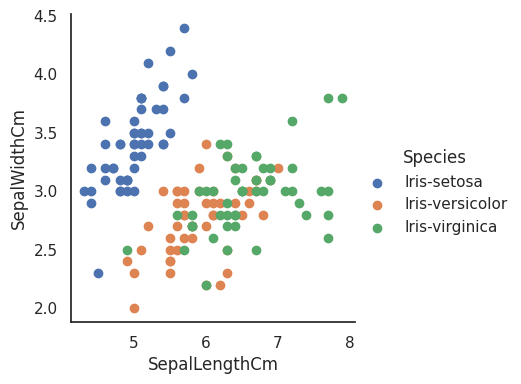

In [ ]:
# use seaborn to make scatter plot showing species for each sample
sns.FacetGrid(data, hue="Species", height=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

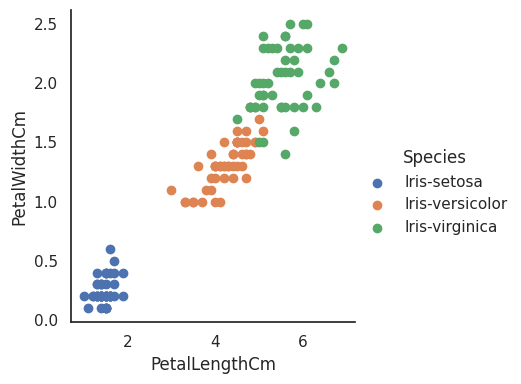

In [ ]:
sns.FacetGrid(data, hue="Species", height=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

In [ ]:
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)
X_scaled

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [ ]:
scaler.fit(X1)
X1_scaled_array = scaler.transform(X1)
X1_scaled = pd.DataFrame(X1_scaled_array, columns = X1.columns)
X1_scaled

,SepalLengthCm,SepalWidthCm
0,-0.900681,1.032057
1,-1.143017,-0.124958
2,-1.385353,0.337848
3,-1.506521,0.106445
4,-1.021849,1.263460
...,...,...
145,1.038005,-0.124958
146,0.553333,-1.281972
147,0.795669,-0.124958
148,0.432165,0.800654


In [ ]:
scaler.fit(X2)
X2_scaled_array = scaler.transform(X2)
X2_scaled = pd.DataFrame(X2_scaled_array, columns = X2.columns)
X2_scaled

,PetalLengthCm,PetalWidthCm
0,-1.341272,-1.312977
1,-1.341272,-1.312977
2,-1.398138,-1.312977
3,-1.284407,-1.312977
4,-1.341272,-1.312977
...,...,...
145,0.819624,1.447956
146,0.705893,0.922064
147,0.819624,1.053537
148,0.933356,1.447956


# K-Means dan GMM Clustering


In [ ]:
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)

km.fit(X1_scaled)
# predict the cluster for each data point
y1_cluster_kmeans = km.predict(X1_scaled)

km.fit(X2_scaled)
# predict the cluster for each data point
y2_cluster_kmeans = km.predict(X2_scaled)

print(y_cluster_kmeans)
print(y1_cluster_kmeans)
print(y2_cluster_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [ ]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score1 = metrics.silhouette_score(X1_scaled, y1_cluster_kmeans)
score2 = metrics.silhouette_score(X2_scaled, y2_cluster_kmeans)

print(score)
print(score1)
print(score2)

0.4589717867018717
0.4364496820919652
0.6736179401065728


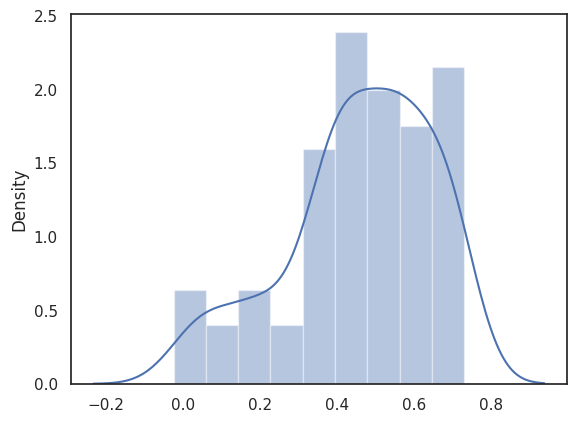

In [ ]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

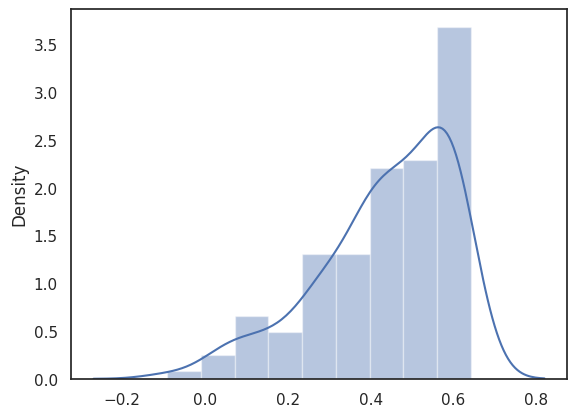

In [ ]:
scores1 = metrics.silhouette_samples(X1_scaled, y1_cluster_kmeans)
sns.distplot(scores1);

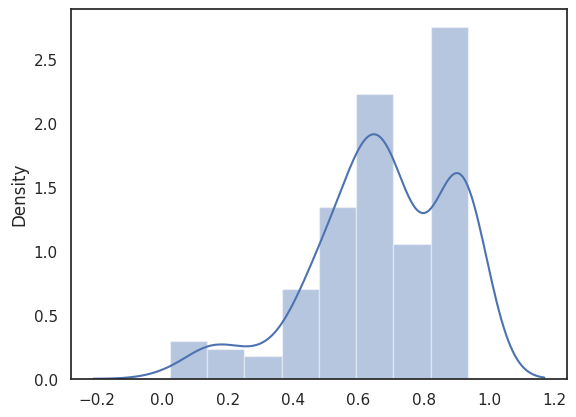

In [ ]:
scores2 = metrics.silhouette_samples(X2_scaled, y2_cluster_kmeans)
sns.distplot(scores2);

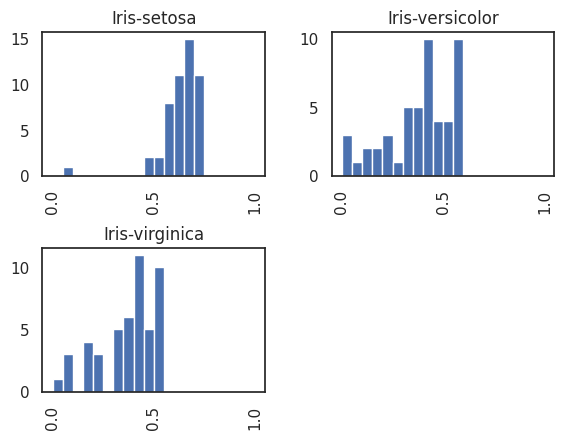

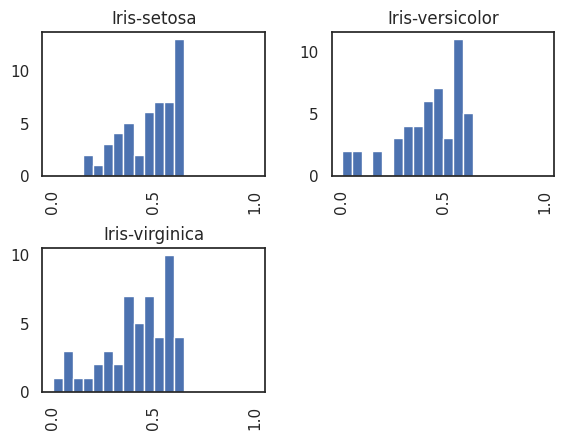

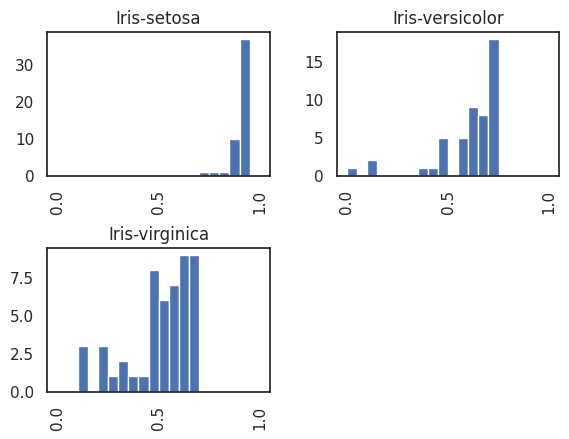

In [ ]:
#distribusi seberapa bagus setiap titik di cluster yang bener(semakin mendekati 1 semakin bagus)
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = data['Species']
df_scores.hist(by='Species', column='SilhouetteScore', range=(0,1.0), bins=20);

df_scores1 = pd.DataFrame()
df_scores1['SilhouetteScore'] = scores1
df_scores1['Species'] = data['Species']
df_scores1.hist(by='Species', column='SilhouetteScore', range=(0,1.0), bins=20);

df_scores2 = pd.DataFrame()
df_scores2['SilhouetteScore'] = scores2
df_scores2['Species'] = data['Species']
df_scores2.hist(by='Species', column='SilhouetteScore', range=(0,1.0), bins=20);

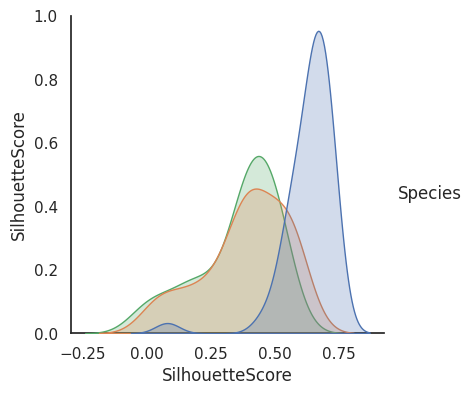

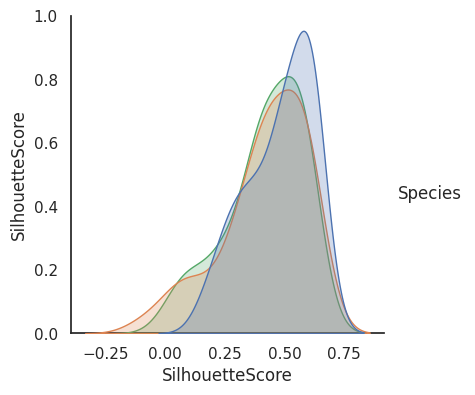

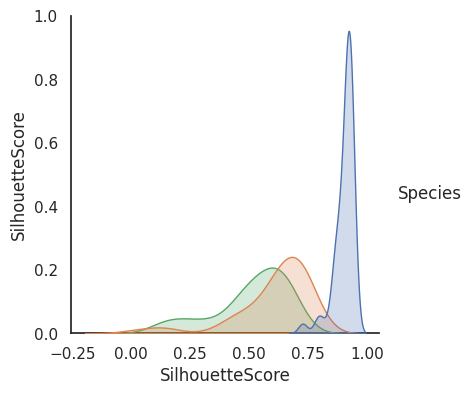

In [ ]:
sns.pairplot(df_scores, hue="Species", size=4);
sns.pairplot(df_scores1, hue="Species", size=4);
sns.pairplot(df_scores2, hue="Species", size=4);

In [ ]:
from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
5,-2.070537,1.518549
29,-2.268790,-0.314879
20,-1.914556,0.430465
12,-2.224083,-0.709118
39,-2.170547,0.292727


In [ ]:
pca.fit(X1_scaled)
X1_pca_array = pca.transform(X1_scaled)
X1_pca = pd.DataFrame(X1_pca_array, columns=['PC1','PC2']) # PC=principal component
X1_pca.sample(5)

,PC1,PC2
39,-1.203026,-0.070730
91,0.308267,0.131550
44,-1.857532,0.583777
23,-1.039399,-0.234356
122,2.006378,1.175155


In [ ]:
pca.fit(X2_scaled)
X2_pca_array = pca.transform(X2_scaled)
X2_pca = pd.DataFrame(X2_pca_array, columns=['PC1','PC2']) # PC=principal component
X2_pca.sample(5)

,PC1,PC2
85,0.671192,0.075010
125,1.460275,-0.342211
5,-1.570276,0.085309
26,-1.610486,0.125519
83,0.912453,-0.166251


In [ ]:
data['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
# so that gives us new 2d coordinates for each data point.

# at this point, if you don't have labelled data,
# you can add the k-means cluster ids to this table and make a
# colored scatterplot.

# we do actually have labels for the data points, but let's imagine
# we don't, and use the predicted labels to see what the predictions look like.

# first, convert species to an arbitrary number
y_id_array = pd.Categorical(data['Species']).codes

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['SpeciesId'] = y_id_array # also add actual labels so we can use it in later plots
df_plot.sample(5)

,PC1,PC2,ClusterKmeans,SpeciesId
110,1.365909,0.693948,2,2
104,1.867891,0.291193,2,2
132,1.860371,-0.184672,2,2
27,-2.168194,0.552016,1,0
22,-2.774170,0.489517,1,0


In [ ]:
#Sepal
df_plot1 = X1_pca.copy()
df_plot1['ClusterKmeans'] = y1_cluster_kmeans
df_plot1['SpeciesId'] = y_id_array # also add actual labels so we can use it in later plots
df_plot1.sample(5)

,PC1,PC2,ClusterKmeans,SpeciesId
18,-1.343461,1.097848,1,0
93,0.511188,-1.956301,0,1
126,0.721199,-0.110024,0,2
4,-1.615958,0.170845,1,0
133,0.806877,-0.024346,0,2


In [ ]:
#Petal
df_plot2 = X2_pca.copy()
df_plot2['ClusterKmeans'] = y2_cluster_kmeans
df_plot2['SpeciesId'] = y_id_array # also add actual labels so we can use it in later plots
df_plot2.sample(5)

,PC1,PC2,ClusterKmeans,SpeciesId
120,1.804472,0.243247,1,2
25,-1.796417,-0.060412,0,0
101,1.191349,0.112646,1,2
123,1.017964,0.100101,1,2
73,0.379751,-0.377272,2,1


In [ ]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby, name):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"

    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure,
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter',
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i),
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title(name); #"Principal Components Analysis (PCA) of Iris Dataset"

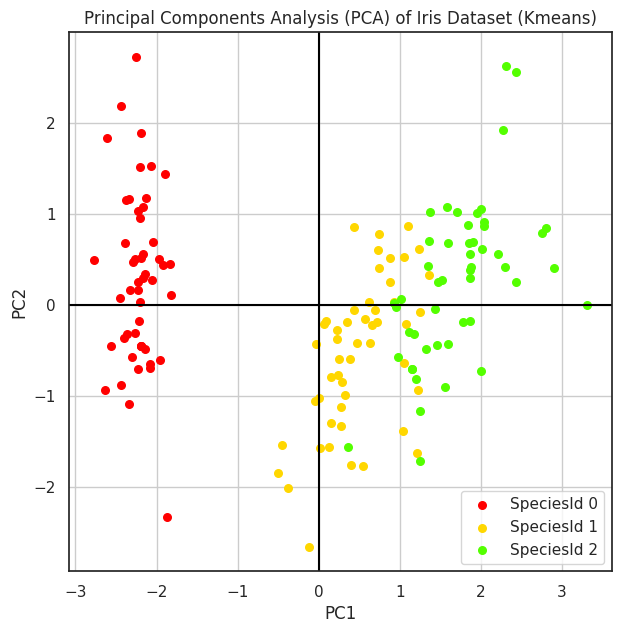

In [ ]:
# plot the clusters each datapoint was assigned to
plotData(df_plot, 'SpeciesId', "Principal Components Analysis (PCA) of Iris Dataset (Kmeans)")

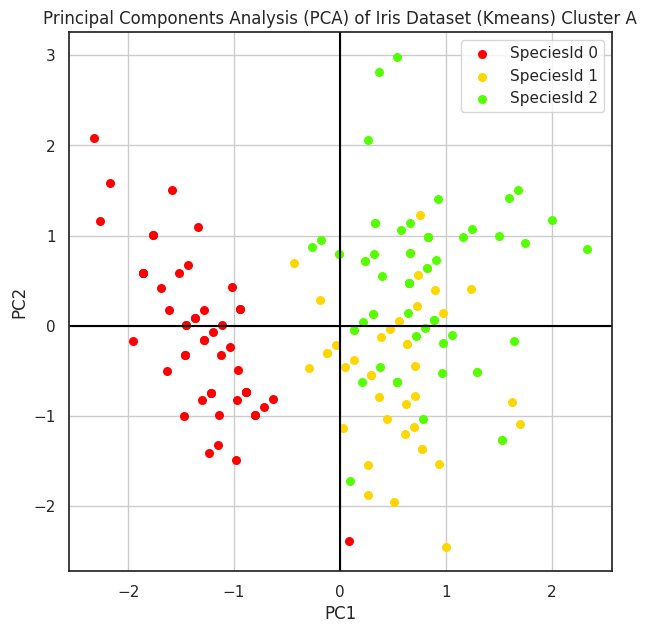

In [ ]:
#Sepal dengan K-Means
plotData(df_plot1, 'SpeciesId', "Principal Components Analysis (PCA) of Iris Dataset (Kmeans) Cluster A")

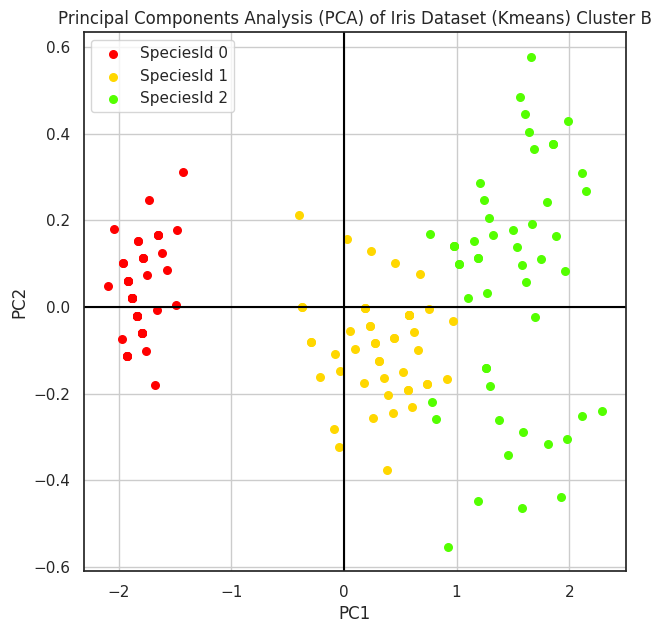

In [ ]:
#Petal dengan K-Means
plotData(df_plot2, 'SpeciesId', "Principal Components Analysis (PCA) of Iris Dataset (Kmeans) Cluster B")

In [ ]:
# now let's try GMM clustering, which tries to fit normally-distributed clusters,
# and might be the case when measuring things like petal and sepal sizes...

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=nclusters)

gmm.fit(X)
# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X)
print(y_cluster_gmm)

# Inisialisasi model GMM dengan algoritma EM
gmm_em = GaussianMixture(n_components=nclusters, covariance_type='full', init_params='kmeans')
# Menyesuaikan model dengan data menggunakan algoritma EM
gmm_em.fit(X)
# Menggunakan model untuk prediksi atau analisis lainnya
y_cluster_gmm_em = gmm_em.predict(X)
print(y_cluster_gmm_em)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
gmm.fit(X1)
# predict the cluster for each data point
y1_cluster_gmm = gmm.predict(X1)
print(y1_cluster_gmm)

gmm_em.fit(X1)
# predict the cluster for each data point
y1_cluster_gmm_em = gmm_em.predict(X1)
print(y1_cluster_gmm_em)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1
 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 1 2 1 1 1 1
 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 2 1 1 1 2 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [ ]:
gmm.fit(X2)
# predict the cluster for each data point
y2_cluster_gmm = gmm.predict(X2)
y2_cluster_gmm

gmm_em.fit(X2)
# predict the cluster for each data point
y2_cluster_gmm_em = gmm_em.predict(X2)
print(y2_cluster_gmm_em)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


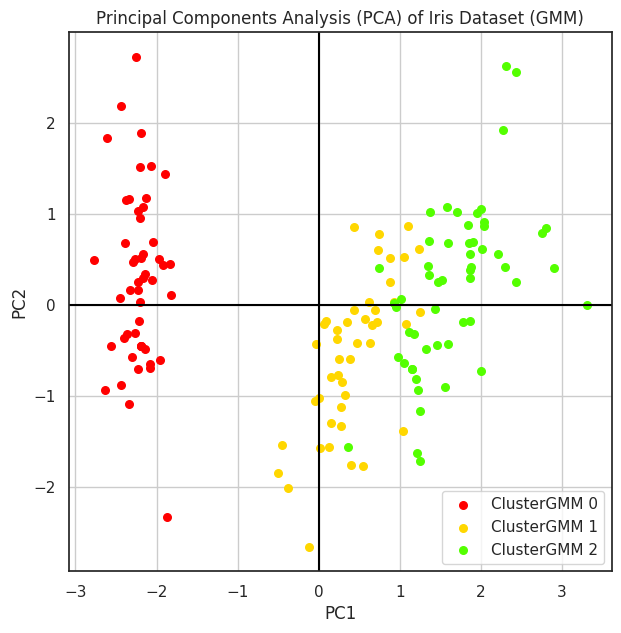

In [ ]:
# add the GMM clusters to our data table and plot them
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM', "Principal Components Analysis (PCA) of Iris Dataset (GMM)")

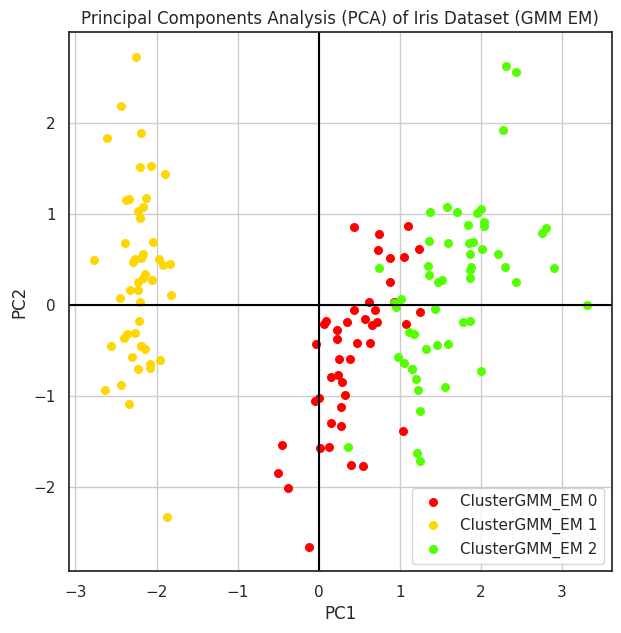

In [ ]:
# add the GMM EM clusters to our data table and plot them
df_plot['ClusterGMM_EM'] = y_cluster_gmm_em
plotData(df_plot, 'ClusterGMM_EM', "Principal Components Analysis (PCA) of Iris Dataset (GMM EM)")

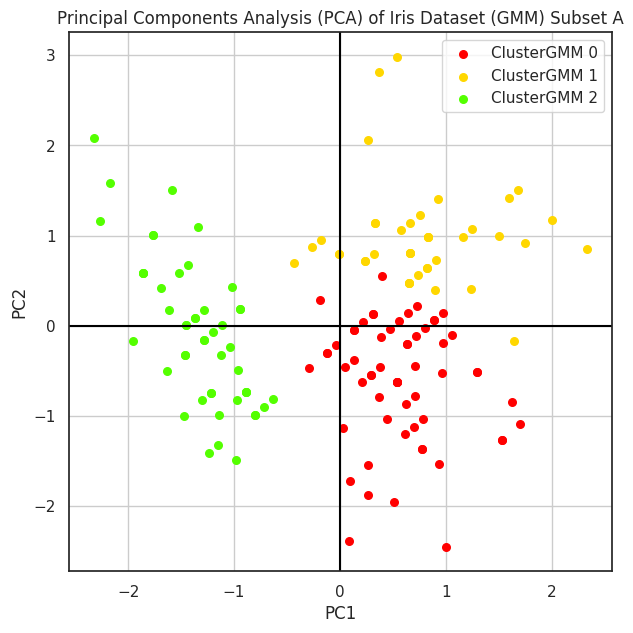

In [ ]:
#Sepal dengan GMM
df_plot1['ClusterGMM'] = y1_cluster_gmm
plotData(df_plot1, 'ClusterGMM', "Principal Components Analysis (PCA) of Iris Dataset (GMM) Subset A")

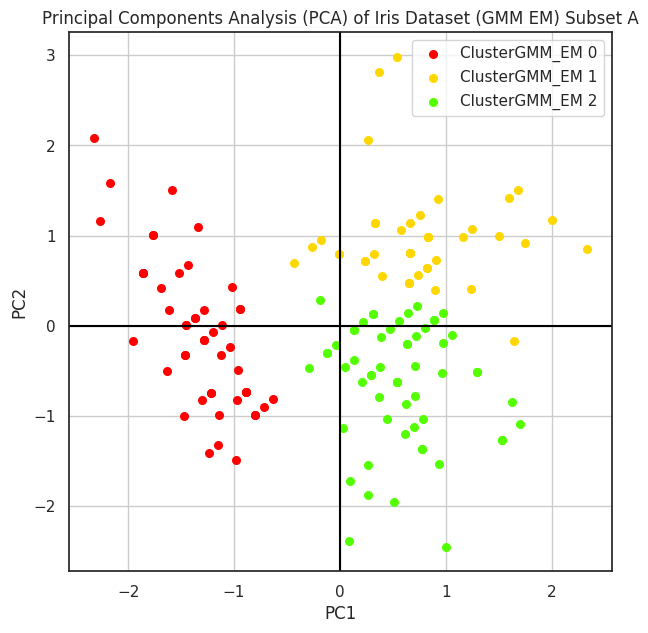

In [ ]:
#Sepal dengan GMM EM
df_plot1['ClusterGMM_EM'] = y1_cluster_gmm_em
plotData(df_plot1, 'ClusterGMM_EM', "Principal Components Analysis (PCA) of Iris Dataset (GMM EM) Subset A")

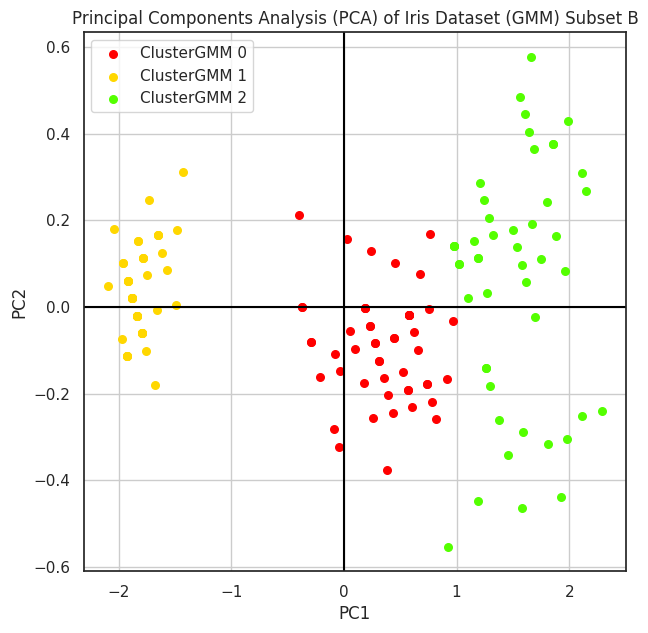

In [ ]:
#Petal dengan GMM
df_plot2['ClusterGMM'] = y2_cluster_gmm
plotData(df_plot2, 'ClusterGMM', "Principal Components Analysis (PCA) of Iris Dataset (GMM) Subset B")

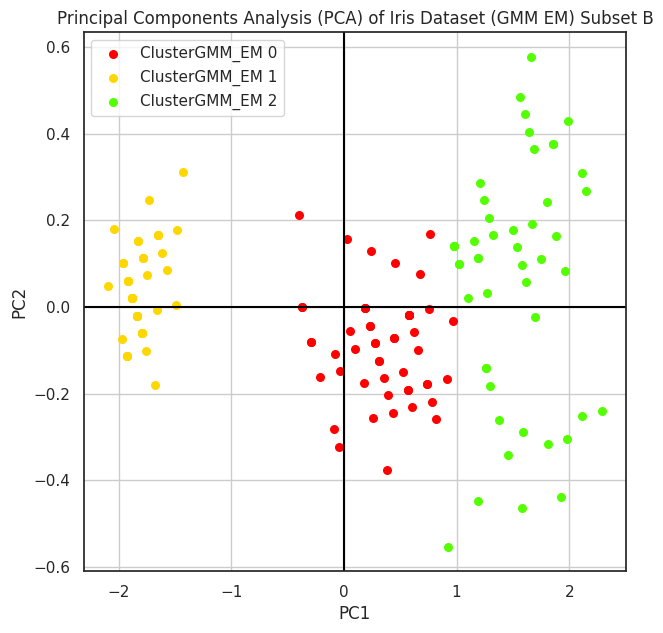

In [ ]:
#Petal dengan GMM EM
df_plot2['ClusterGMM_EM'] = y2_cluster_gmm_em
plotData(df_plot2, 'ClusterGMM_EM', "Principal Components Analysis (PCA) of Iris Dataset (GMM EM) Subset B")

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

score_total_kmeans = adjusted_rand_score(y, y_cluster_kmeans)
score_total_gmm = adjusted_rand_score(y, y_cluster_gmm)
score_total_gmm_em = adjusted_rand_score(y, y_cluster_gmm_em)
print(score_total_kmeans)
print(score_total_gmm)
print(score_total_gmm_em)

0.6201351808870379
0.9038742317748124
0.9038742317748124


In [ ]:
#Untuk Sepal
score_total_kmeans1 = adjusted_rand_score(y, y1_cluster_kmeans)
score_total_gmm1 = adjusted_rand_score(y, y1_cluster_gmm)
score_total_gmm_em1 = adjusted_rand_score(y, y1_cluster_gmm)
print(score_total_kmeans1)
print(score_total_gmm1)
print(score_total_gmm_em1)

0.5189566358734046
0.5473439141421311
0.5473439141421311


In [ ]:
#Untuk Petal
score_total_kmeans2 = adjusted_rand_score(y, y2_cluster_kmeans)
score_total_gmm2 = adjusted_rand_score(y, y2_cluster_gmm)
score_total_gmm_em2 = adjusted_rand_score(y, y2_cluster_gmm)
print(score_total_kmeans2)
print(score_total_gmm2)
print(score_total_gmm_em2)

0.8856970310281228
0.9221767019765943
0.9221767019765943


# Kesimpulan Jawaban

Setelah melakukan pengelompokan untuk menjawab pertanyaan poin (a) Didapatkan dari hasil clustering metode GMM dan K-means, Jawaban poin(b) metode yang   dalam menentukan cluster lebih baik(mendekati sebenarnya) adalah GMM clustering dibandingkan K-means.

Karena dari perbandingan Adjusted Rand dalam kasus didapatkan
- Untuk K-Means clustering:

sepal = 0.5189566358734046;
petal = 0.8856970310281228

- Untuk GMM Clustering:

sepal = 0.5473439141421311;
petal = 0.9221767019765943

Sehingga dapat dilihat yang dominan membedakan antar spesies adalah PetalLenght vs Petalwitdh dibandingkan dengan SepalLenght vs Sepal width dapat dilihat dengan hasil adjusted rand score Petal pada GMM clustering adalah 0.9221767019765943 yaitu mendekati 1.
